In [1]:
import os  # OS operations like file handling
import torch
import random  # Random number generation
import pandas as pd  # Data manipulation 
from PIL import Image  # Image processing
import cv2  # Computer vision tasks
from IPython.display import Video  # Display videos in Jupyter notebooks
import numpy as np  # Numerical computations
import matplotlib.pyplot as plt  # Plotting graphs and visualizations
import seaborn as sns  # Statistical data visualizations
sns.set(style='darkgrid')
import pathlib  # File system paths handling
import glob  # File pattern matching (e.g., search for files)
from tqdm.notebook import trange, tqdm  # Progress bars in notebooks
import warnings  # Manage warning messages
warnings.filterwarnings('ignore')
from ultralytics import YOLO 

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/samsaim/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


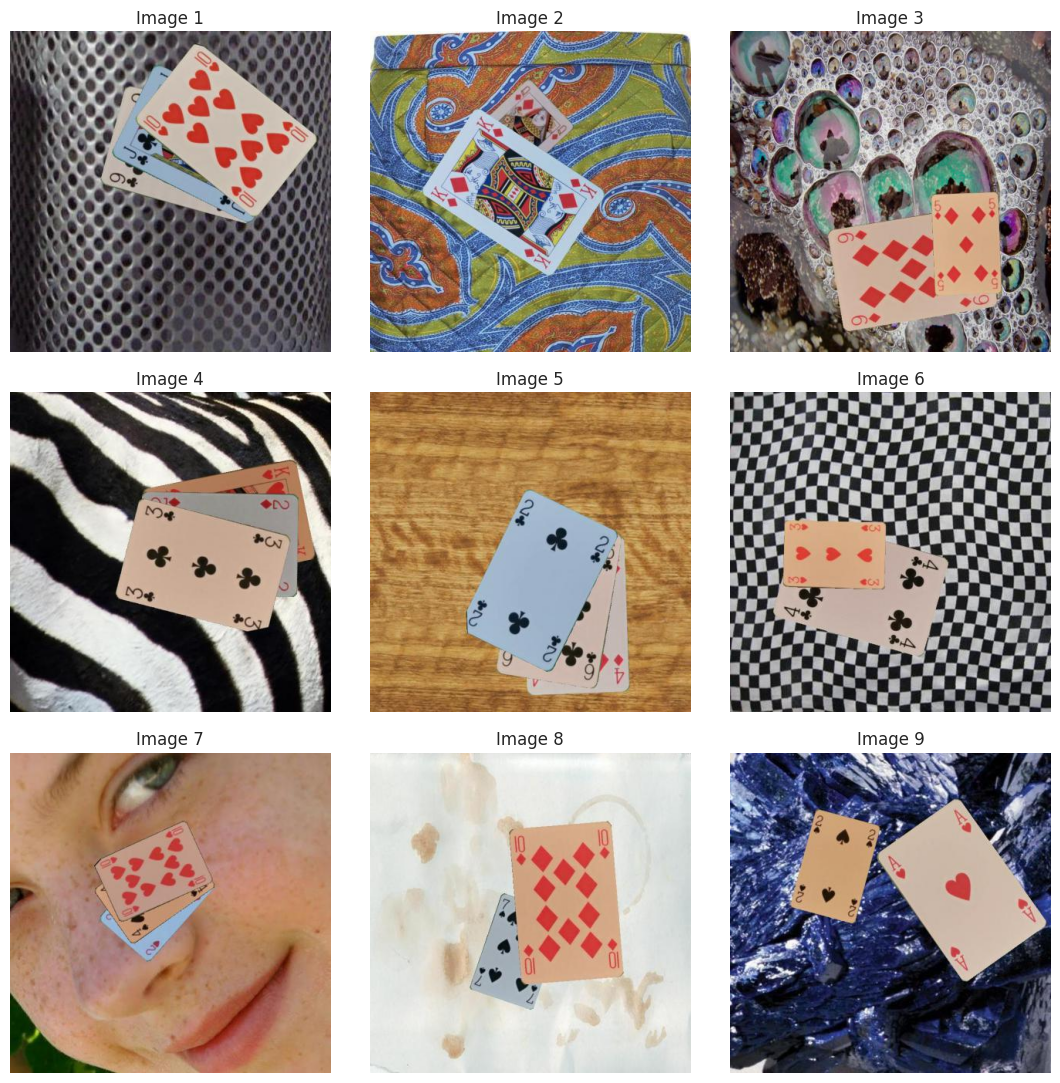

In [2]:
train_path = "./train/images"
val_path   = "./valid/images"
training_images_dir = train_path
num_samples = 9
image_files = os.listdir(training_images_dir)
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(training_images_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [3]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1" 
print(f"Total GPUs visible: {torch.cuda.device_count()}")
print(f"Current GPU: {torch.cuda.get_device_name(0)}")

Total GPUs visible: 1
Current GPU: Quadro RTX 6000


In [6]:
Final_model = YOLO('yolov5nu.pt')

Result_Final_model = Final_model.train(
    data="data.yaml",
    epochs=10,
    batch=16,        
    optimizer='auto',
    device=0,       
    cache=False,
    imgsz=416
)

Ultralytics 8.4.11 🚀 Python-3.11.2 torch-2.10.0+cu128 CUDA:0 (Quadro RTX 6000, 24023MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov5nu.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train23, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

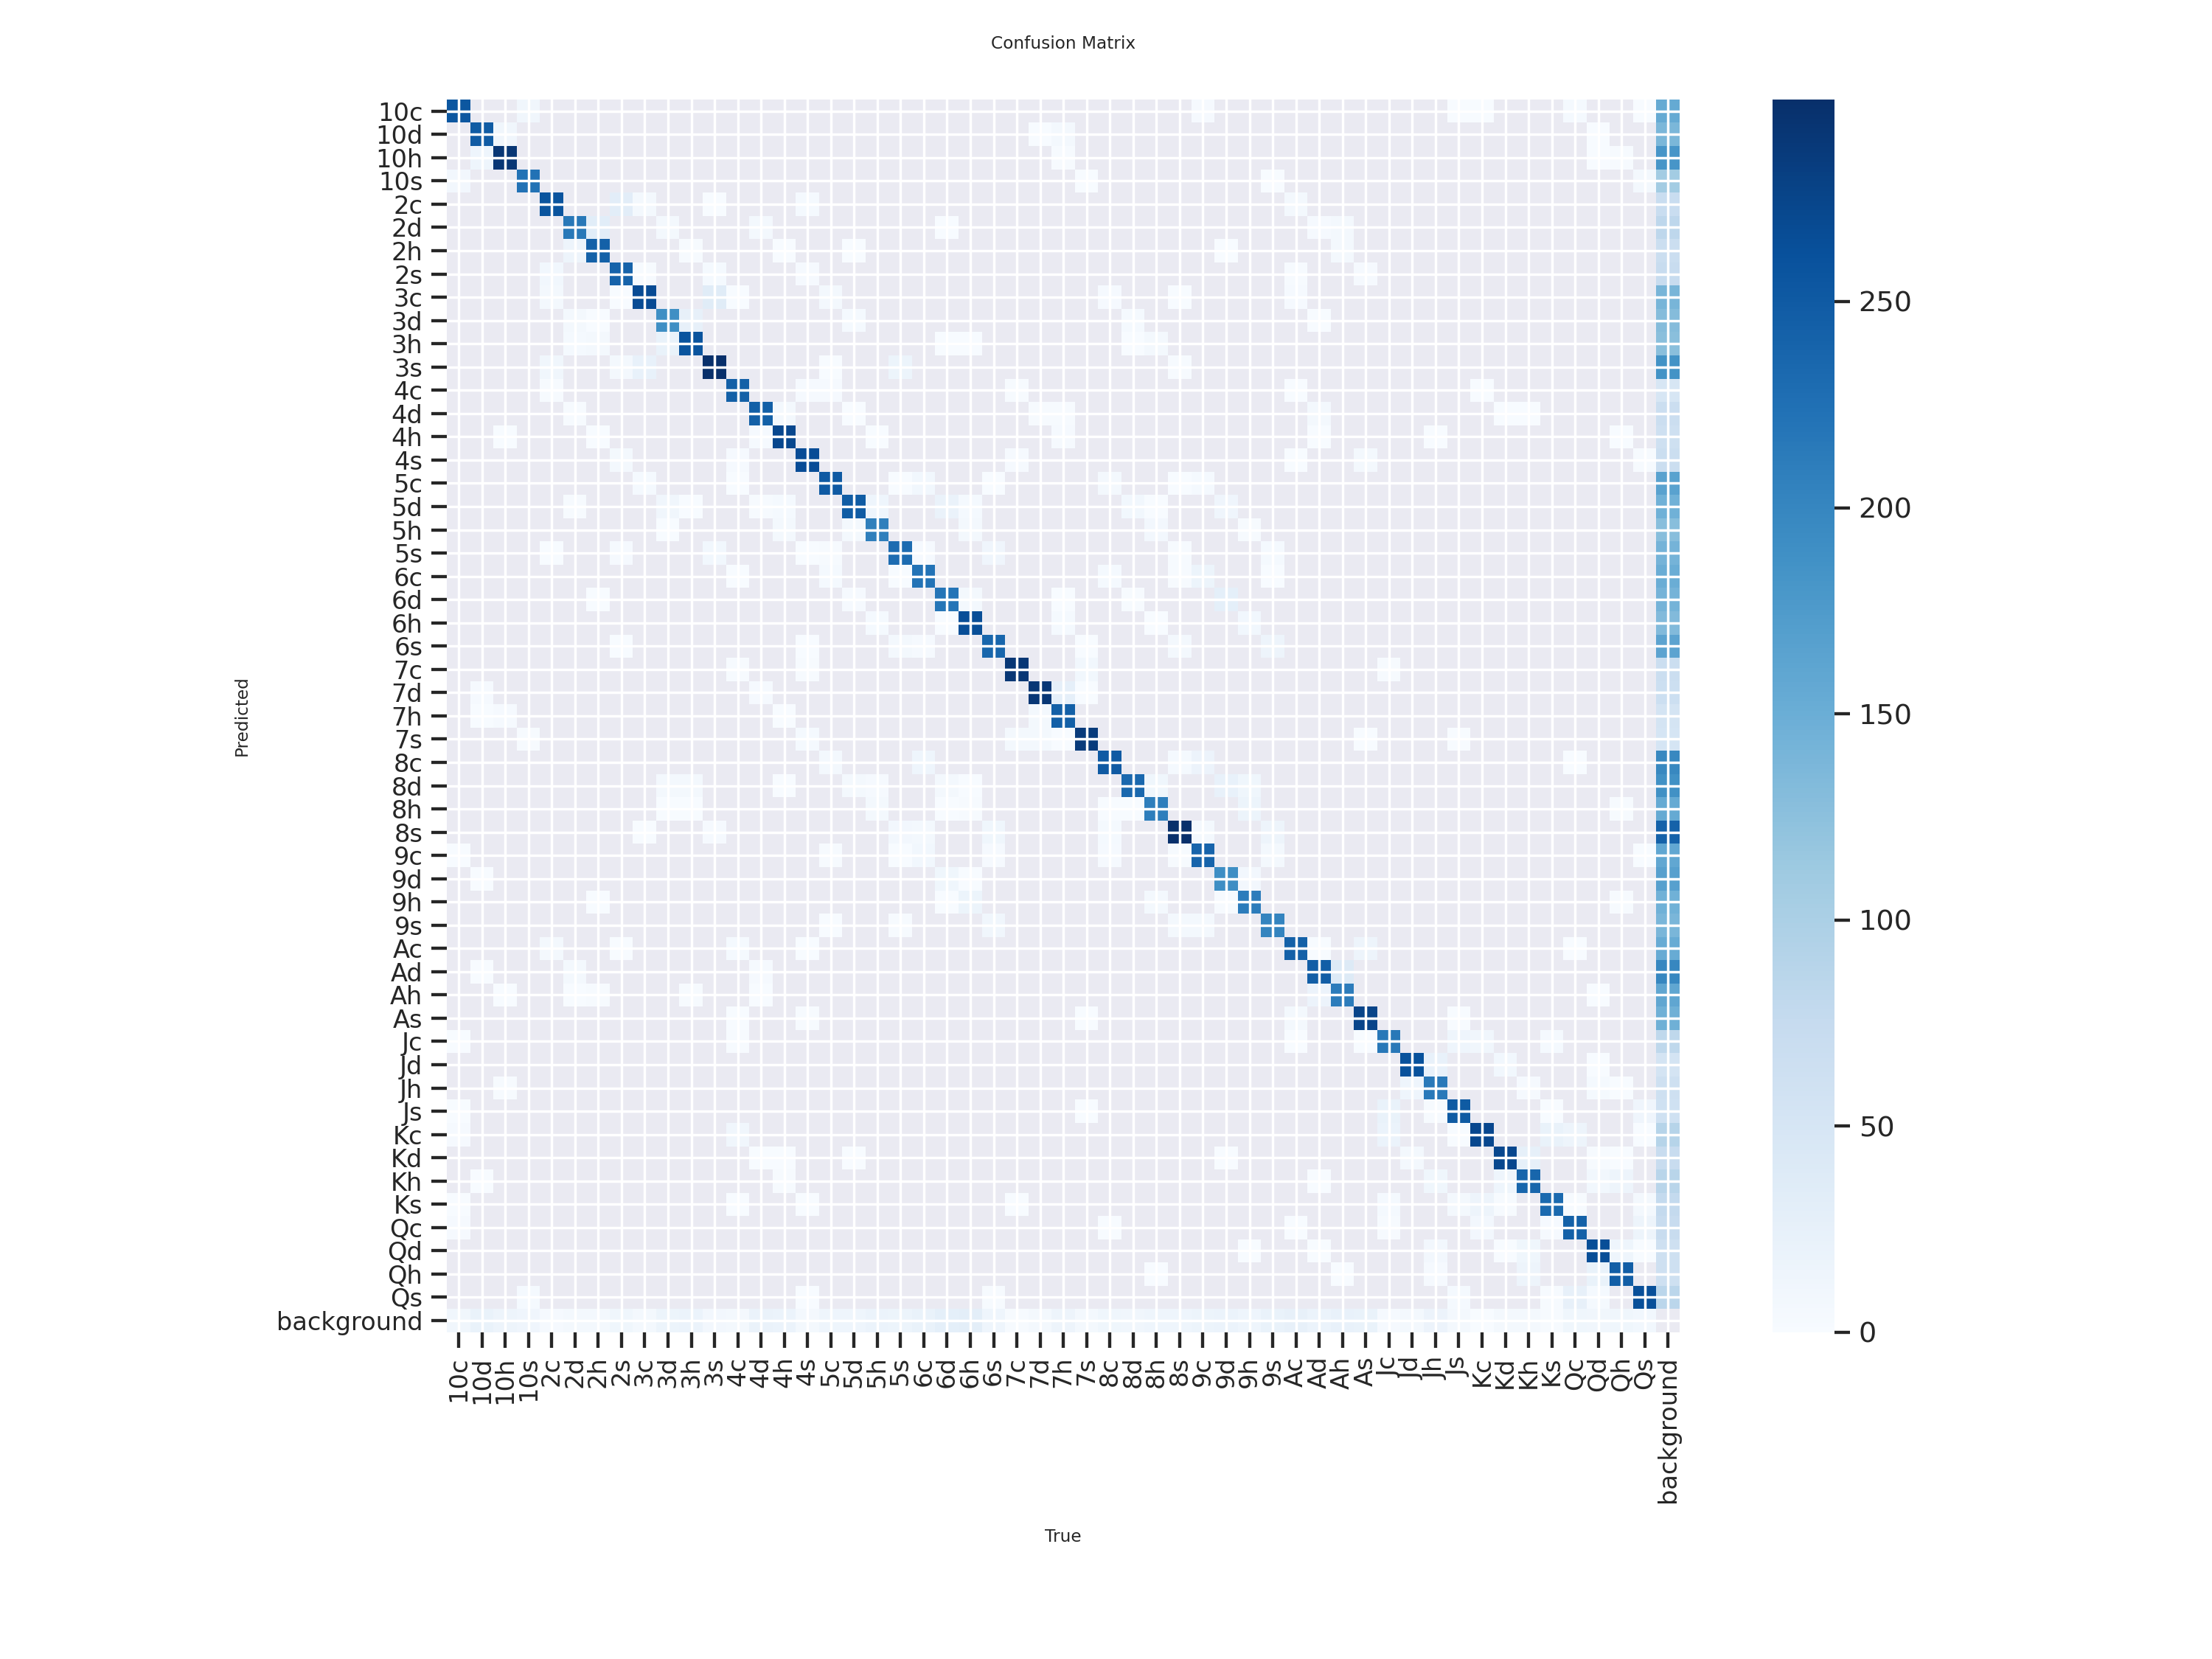

In [7]:
conf_matrix_path = '/work/csse463/202620/03/runs/detect/train23/confusion_matrix.png'
display(Image.open(conf_matrix_path))

In [8]:
Result_Final_model = pd.read_csv('/work/csse463/202620/03/runs/detect/train23/results.csv')
Result_Final_model.tail(10)

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   194.805         1.29598         4.52868         0.95936   
1      2   359.155         0.86272         2.91248         0.83965   
2      3   551.313         0.77237         2.24092         0.83048   
3      4   730.214         0.72082         1.82678         0.82247   
4      5   899.059         0.68153         1.51751         0.81770   
5      6  1071.130         0.65716         1.30978         0.81562   
6      7  1272.240         0.63817         1.17939         0.81368   
7      8  1493.330         0.62071         1.08919         0.81003   
8      9  1693.400         0.60990         1.02779         0.80924   
9     10  1879.900         0.60185         0.99239         0.80831   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.05041            0.18590           0.04495   
1               0.21239            0.44083           0.23391   
2               0.37571            0.58264           0.45216   
3               0.55628            0.66563           0.64522   
4               0.64768            0.74017           0.74668   
5               0.72585            0.79181           0.81856   
6               0.74543            0.81749           0.84412   
7               0.77589            0.82740           0.86681   
8               0.78446            0.84794           0.88205   
9               0.78584            0.84640           0.88588   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.03528       0.82752       2.92819       0.82601  0.000060   
1              0.19254       0.68409       2.15112       0.81136  0.000107   
2              0.38053       0.63332       1.64169       0.80533  0.000144   
3              0.54939       0.61141       1.28577       0.80296  0.000126   
4              0.64618       0.56607       1.07813       0.79821  0.000108   
5              0.71085       0.55359       0.92771       0.79711  0.000090   
6              0.73421       0.54652       0.85502       0.79534  0.000073   
7              0.75605       0.53772       0.79480       0.79523  0.000055   
8              0.76956       0.53558       0.75740       0.79397  0.000037   
9              0.77748       0.51963       0.74028       0.79306  0.000020   

     lr/pg1    lr/pg2  
0  0.000060  0.000060  
1  0.000107  0.000107  
2  0.000144  0.000144  
3  0.000126  0.000126  
4  0.000108  0.000108  
5  0.000090  0.000090  
6  0.000073  0.000073  
7  0.000055  0.000055  
8  0.000037  0.000037  
9  0.000020  0.000020

In [9]:
test_path = './test/images'
model = YOLO('/work/csse463/202620/03/runs/detect/train23/weights/best.pt')
results = model.predict(source=test_path, save=True, imgsz=416, conf=0.25)
print(f"Visual results saved to: {results[0].save_dir}")


WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/2000 /work/csse463/202620/03/test/images/000246247_jpg.rf.fb915aef7c063ce2ac971f8de0d8b2c1.jpg: 416x416 2 7cs, 1 8d, 1 As, 7.6ms
image 2/2000 /work/csse463/202620/03/test/images/000355142_jpg.rf.7e5eff691d035112dd4b5021fe38a46c.jpg: 416x416 2 4ss, 1 8h, 1 Kh, 15.5ms
image 3/2000 /work/csse463/202620/03/test/images/001761433_jpg.rf.1a4a563beb6d588841bd8bd3a50c083b.jpg: 416x416 3 8cs, 4 8ds, 1 8s, 7.3ms
image 4/2000 /work/csse463/202620/03/test/ima

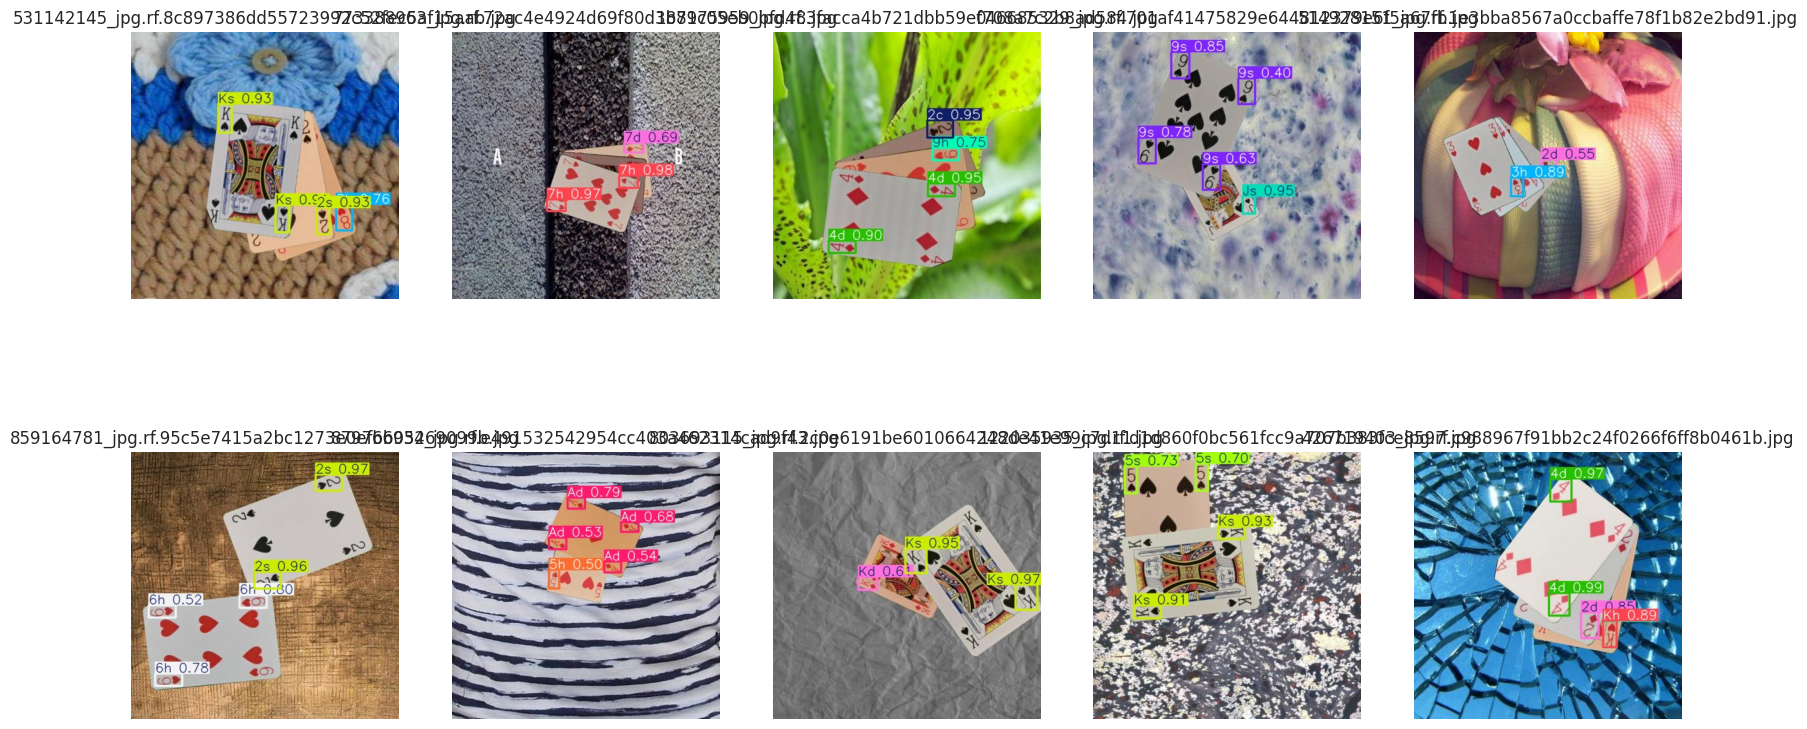

In [12]:
predict_dir = '/work/csse463/202620/03/runs/detect/predict2'

# Get list of all images in that folder
all_images = [f for f in os.listdir(predict_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Pick 3 random images
samples = random.sample(all_images, min(10, len(all_images)))

# Plot them
plt.figure(figsize=(20, 10))
for i, img_name in enumerate(samples):
    img_path = os.path.join(predict_dir, img_name)
    img = Image.open(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis('off')

plt.show()

In [ ]:
model = YOLO('/work/csse463/202620/03/runs/detect/train23/weights/best.pt')

# Run validation on the test split
stats = model.val(split='test')

# Print the important stats
print(f"Overall Precision: {stats.results_dict['metrics/precision(B)']:.3f}")
print(f"Overall Recall:    {stats.results_dict['metrics/recall(B)']:.3f}")
print(f"Overall mAP50:     {stats.results_dict['metrics/mAP50(B)']:.3f}")

Ultralytics 8.4.11 🚀 Python-3.11.2 torch-2.10.0+cu128 CUDA:0 (Quadro RTX 6000, 24023MiB)
YOLOv5n summary (fused): 85 layers, 2,513,084 parameters, 0 gradients, 7.1 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.1 ms, read: 30.9±9.8 MB/s, size: 38.2 KB)
val: Scanning /work/csse463/202620/03/test/labels.cache... 2000 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 2000/2000 220.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 125/125 3.0it/s 41.7s0.2ss
                   all       2000       7588      0.794      0.825      0.878      0.773
                   10c         89        137      0.664      0.835      0.812       0.69
                   10d        103        170      0.713      0.782      0.839      0.708
                   10h        100        149      0.684      0.711      0.785      0.648
                   10s         96        151      0.779      0.808      0.889      0.756
                    2c     